# Logistic Regression

Import modules

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


np.random.seed(1)

Load data 

In [2]:
df = pd.read_excel('LR.xlsx',sheet_name= 1)
df.head(3)

,Attempt,Success,Bait,Place
0,1,1,Bread,Grandma's Pond
1,2,1,Bread,Grandma's Pond
2,3,1,Bread,Grandma's Pond


In [3]:
df.isna().sum()

Attempt    0
Success    0
Bait       0
Place      0
dtype: int64

In [4]:
df.describe()

,Attempt,Success
count,204.000000,204.000000
mean,102.500000,0.558824
std,59.033889,0.497749
min,1.000000,0.000000
25%,51.750000,0.000000
50%,102.500000,1.000000
75%,153.250000,1.000000
max,204.000000,1.000000


## Exploratory Data Analysis


In [5]:
df.corr()

,Attempt,Success
Attempt,1.000000,0.180722
Success,0.180722,1.000000


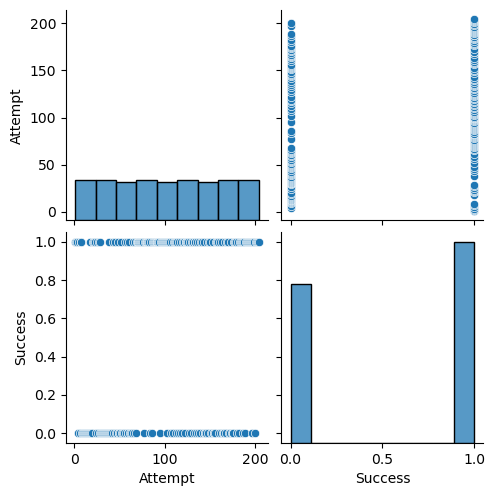

In [8]:
sns.pairplot(df)

## Encoding

In [9]:
df

,Attempt,Success,Bait,Place
0,1,1,Bread,Grandma's Pond
1,2,1,Bread,Grandma's Pond
2,3,1,Bread,Grandma's Pond
3,4,0,Bread,Grandma's Pond
4,5,1,Bread,Grandma's Pond
...,...,...,...,...
199,200,0,Live Bait,Uncle Ron's Canal
200,201,1,Live Bait,Uncle Ron's Canal
201,202,1,Live Bait,Uncle Ron's Canal
202,203,1,Live Bait,Uncle Ron's Canal


In [10]:
df = df.join(pd.get_dummies(df['Bait'],prefix= 'Bait'))
df = df.join(pd.get_dummies(df['Place'],prefix= 'Place'))

In [12]:
df = df.drop(['Bait','Place'],axis=1)
df.head()

,Attempt,Success,Bait_Bread,Bait_Hot Dogs,Bait_Live Bait,Place_Grandma's Pond,Place_Uncle Ron's Canal
0,1,1,1,0,0,1,0
1,2,1,1,0,0,1,0
2,3,1,1,0,0,1,0
3,4,0,1,0,0,1,0
4,5,1,1,0,0,1,0


In [13]:
X = df.drop(['Attempt','Success'],axis=1)
y = df[['Success']]

## logistic regression model

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
log_reg = LogisticRegression().fit(X_train, np.ravel(y_train))
#ravel  will convert into array which contains arrays

Add a column to the dataframe with the predicted values

In [19]:
test_pred = log_reg.predict(X_test)
test_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Add a column of the probabilities of being a 1

In [20]:
test_pred_proba = log_reg.predict_proba(X_test)[:,1]
test_pred_proba

array([0.3887282 , 0.3887282 , 0.70251852, 0.70440113, 0.70440113,
       0.3865859 , 0.70251852, 0.63800876, 0.63592186, 0.63800876,
       0.70440113, 0.63800876, 0.63800876, 0.63800876, 0.3865859 ,
       0.63592186, 0.3887282 , 0.70440113, 0.3865859 , 0.63800876,
       0.63800876, 0.70440113, 0.70440113, 0.3887282 , 0.70251852,
       0.3887282 , 0.63800876, 0.70440113, 0.70251852, 0.70251852,
       0.3865859 , 0.70440113, 0.70251852, 0.70440113, 0.70440113,
       0.70440113, 0.70251852, 0.70251852, 0.63800876, 0.70440113,
       0.70440113, 0.63592186, 0.70440113, 0.3887282 , 0.3887282 ,
       0.70440113, 0.70251852, 0.3887282 , 0.3887282 , 0.3865859 ,
       0.63800876, 0.63800876, 0.70440113, 0.3887282 , 0.63800876,
       0.70251852, 0.63592186, 0.63800876, 0.63592186, 0.63800876,
       0.70440113, 0.63800876])

Display the probabilities and the predicted values

In [22]:
X_test

,Bait_Bread,Bait_Hot Dogs,Bait_Live Bait,Place_Grandma's Pond,Place_Uncle Ron's Canal
15,1,0,0,1,0
9,1,0,0,1,0
115,0,1,0,0,1
78,0,1,0,1,0
66,0,1,0,1,0
...,...,...,...,...,...
143,0,0,1,1,0
190,0,0,1,0,1
176,0,0,1,1,0
73,0,1,0,1,0


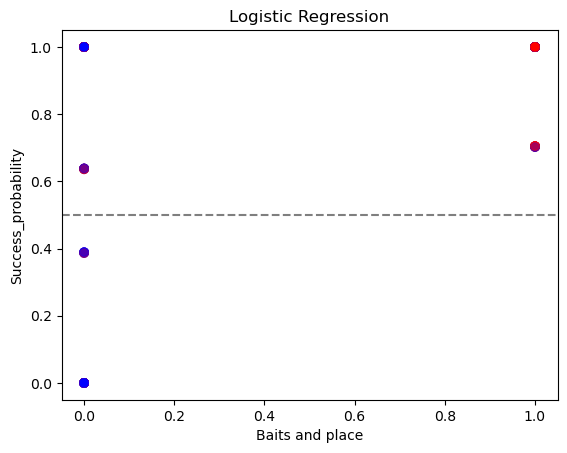

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
#ax.scatter(X, y, c=y.iloc[:,0])
colors = np.array(["blue", "red"])
ax.scatter(X_test['Bait_Hot Dogs'], test_pred, c=colors[np.ravel(y_test)])
ax.scatter(X_test['Bait_Hot Dogs'], test_pred_proba, c=colors[np.ravel(y_test)], alpha=0.4)
plt.axhline(.5, color="black", label="cutoff", linestyle='--', alpha=.5)
ax.set_xlabel('Baits and place')
ax.set_ylabel('Success_probability')
ax.set_title('Logistic Regression')
plt.show()

#7 errors 

Identify the coefficients and intercept.

In [29]:
log_reg.coef_

array([[-0.78013847,  0.54086744,  0.23925484,  0.00450432, -0.0045205 ]])

In [30]:
log_reg.coef_
b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]
b2 = log_reg.coef_[0][1]
b3 = log_reg.coef_[0][2]
b4 = log_reg.coef_[0][3]
b5 = log_reg.coef_[0][4]
r2 = log_reg.score(X_test, y_test)


In [32]:

print(f"Y = {b0:.2f} + {b1:.2f}x1 + {b2:.2f}x2 + {b3:.3f}x3 + {b4:.4f}x4 + {b5:.4f}x5")
print(f"R^2: {r2:.3f}")

Y = 0.32 + -0.78x1 + 0.54x2 + 0.239x3 + 0.0045x4 + -0.0045x5
R^2: 0.677
